<a href="https://colab.research.google.com/github/yumeniown/module_4-2/blob/main/ht_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание
1. Задача: протестировать модель - Быстрый перенос стиля с использованием TF-Hub
2. Нужно взять любые два фото и попробовать отобразить одно в стиле другого
3. Сдавать - ссылкой на колаб

Импорт и конфигурация модулей

In [42]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import matplotlib as mpl

os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [43]:
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

In [44]:
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

Скачивание изображения и выбор изображение стиля и изображение содержимого

In [45]:
content_path = '/content/n1.jpg'
style_path = '/content/n3.jpg'

Определение функции для загрузки и  предобработки изображения и ограничения его максимального размера до 512 пикселей

In [46]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

Создание простой функции для отображения изображения

In [47]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)

    if title:
        plt.title(title)

    plt.axis('off')

    plt.show()

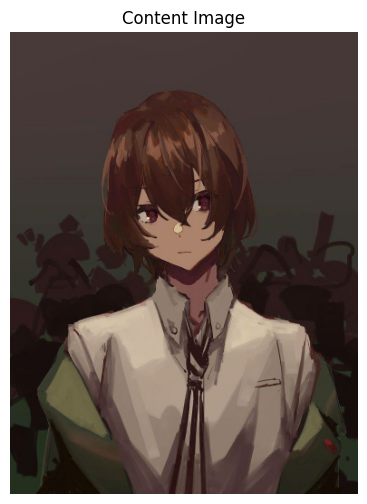

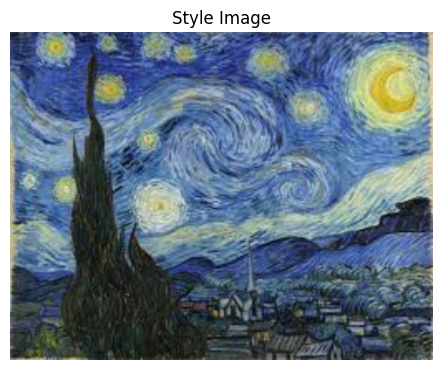

In [48]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')
plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

plt.show()

Быстрый перенос стиля с использованием TF-Hub

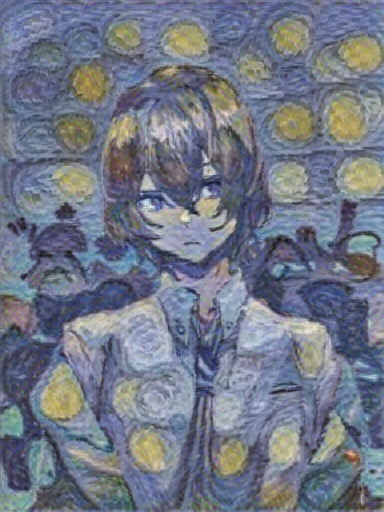

In [49]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Преобразуем тензор с результирующим изображением в формат, подходящий для отображения
result_image = tensor_to_image(stylized_image)

result_image